<a href="https://colab.research.google.com/github/nbarnett19/Computational_Language_Tech/blob/Natalie/Stage_2_Natalie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction:

Stage 2: Training word and sentence embedding models




In this step, students train their own embedding models based on the given dataset and compare the model performance with the open-source embedding models.

> Data Preparation for Embeddings
*   Preprocess the text data for training embeddings, ensuring it is clean and well-structured.
*   Split the data into training and validation sets to assess model performance.

> Word Embedding Training
*   Train word embeddings using techniques like Word2Vec, FastText, or GloVe on the text data.
* Experiment with hyperparameters such as vector dimensions, context window size, and training epochs to optimize word embeddings.

> Sentence Embedding Training
* Develop sentence embeddings using methods like averaging word vectors, Doc2Vec, or
BERT embeddings.
* Fine-tune the sentence embeddings on the cleantech-specific data.
> Embedding Model Evaluation
* Assess the quality of both word and sentence embeddings using intrinsic evaluation methods,
including word similarity and analogy tasks.
* Compare the performance of the in-house embeddings to open source embeddings like Word2Vec, GloVe, or BERT embeddings.

> Transfer Learning with Open Source Models [Optional]
* Implement transfer learning by fine-tuning pre-trained open source models such as BERT or GPT-2 on the text data.
* Compare the performance of transfer learning with the in-house embeddings. This comparison could be done through evaluating the effectiveness of the embeddings in domain-specific tasks like topic classification.

> Outputs:
* Notebook with annotated model training steps.
* Notebook with visualizations comparing the performance of the embedding models.


In [1]:
# Top2Vec Modelling
%%capture
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]

# Import Libraries

In [2]:
# Preprocessing
%%capture
!python -m spacy download en_core_web_sm

import numpy as np
import pandas as pd
import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from gensim.parsing.preprocessing import STOPWORDS
import re

nlp = spacy.load('en_core_web_sm')

In [3]:
# Preprocessing
# Download nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

True

In [4]:
# Exploratory Analysis
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import _stop_words as sklearn_stop_words
from gensim.models.doc2vec import TaggedDocument
from sklearn import preprocessing

In [5]:
# Word2Vec and Doc2Vec
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from gensim.models import Word2Vec
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torchtext.data.utils import get_tokenizer
from sklearn.metrics.pairwise import cosine_similarity

# Processing packages
import gensim
from gensim.models import Word2Vec
from gensim import utils
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from gensim.test.utils import datapath
from nltk.probability import FreqDist
import random
import copy

In [6]:
# Plots
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30

In [7]:
# Install packages for Top2Vec
%%capture
from top2vec import Top2Vec

In [8]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/NLP_models"

Mounted at /content/drive


# Load the Data

First step is to load our data from the csv file into a dataframe.

In [9]:
!wget https://github.com/nbarnett19/Computational_Language_Tech/raw/Main/cleantech_media_dataset_v1_20231109.zip
!unzip /content/cleantech_media_dataset_v1_20231109.zip

--2023-12-20 10:05:29--  https://github.com/nbarnett19/Computational_Language_Tech/raw/Main/cleantech_media_dataset_v1_20231109.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nbarnett19/Computational_Language_Tech/Main/cleantech_media_dataset_v1_20231109.zip [following]
--2023-12-20 10:05:29--  https://raw.githubusercontent.com/nbarnett19/Computational_Language_Tech/Main/cleantech_media_dataset_v1_20231109.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14880158 (14M) [application/zip]
Saving to: ‘cleantech_media_dataset_v1_20231109.zip’

cleantech_media_dat 100%[===================>]  

In [10]:
df = pd.read_csv("cleantech_media_dataset_v1_20231109.csv")

In [11]:
# Inspect dataframe
pd.DataFrame.head(df)

Unnamed: 0                                                title  \
0        1280   Qatar to Slash Emissions as LNG Expansion Advances   
1        1281                 India Launches Its First 700 MW PHWR   
2        1283                New Chapter for US-China Energy Trade   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy Plan   
4        1285       NYC Pension Funds to Divest Fossil Fuel Shares   

         date author  \
0  2021-01-13    NaN   
1  2021-01-15    NaN   
2  2021-01-20    NaN   
3  2021-01-22    NaN   
4  2021-01-25    NaN   

                                                                                               content  \
0  ["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...   
1  ["• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...   
2  ["New US President Joe Biden took office this week with the US-China relationship at its worst i...   
3  ["The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...   
4  ["Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...   

        domain  \
0  energyintel   
1  energyintel   
2  energyintel   
3  energyintel   
4  energyintel   

                                                                url  
0  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000  
1  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001  
2  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000  
3  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000  
4  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000

In [12]:
# Inspect dataframe shape
df.shape

(9607, 7)

The dataframe contains 9607 records and 7 attributes.

In [13]:
# Check for NAs
print(df.isnull().sum())

Unnamed: 0       0
title            0
date             0
author        9576
content          0
domain           0
url              0
dtype: int64


There are no NAs in the title or content columns which are the most important for topic modelling. We can also see that the author column has almost no data so we can drop this column.

# Preprocessing

We create a function to apply the first preprocessing steps. This includes dropping any duplicated records, changing the contents to lower case, removing non alpha-numeric characters, tokenizing the contents and adding a word count.

In [14]:
def preprocess_data(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Remove digits << Added because the tokenized numbers do not bring value to our analysis
    df['content_cleaned'] = df['content'].str.replace('\d+', '', regex=True)

    # Convert content to lower case
    df['content_cleaned'] = df['content_cleaned'].apply(lambda x: x.lower())

    # Remove symbols and punctuation (not sure about this step)
    df['content_cleaned'] = df['content_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

    # Tokenize
    df['tokenized_content'] = df['content_cleaned'].apply(lambda x: nltk.word_tokenize(x))

    # Remove digits << Added because the tokenized numbers do not bring value to our analysis
    df['tokenized_content'] = df['tokenized_content'].replace('[0-9]+', '', regex=True)

    # Add word count column
    df['word_count'] = df['tokenized_content'].apply(lambda x: len(x))

    # Remove unused columns
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.drop('author', axis=1, inplace=True)

    return df

df = preprocess_data(df)

In [15]:
df[['content_cleaned', 'tokenized_content', 'word_count']].head()

content_cleaned  \
0  qatar petroleum  qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...   
1   nuclear power corp of india ltd  npcil synchronized kakrapar in the western state of gujarat to...   
2  new us president joe biden took office this week with the uschina relationship at its worst in d...   
3  the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...   
4  two of new york citys largest pension funds say they will divest roughly   billion in shares of ...   

                                                                                     tokenized_content  \
0  [qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...   
1  [nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...   
2  [new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...   
3  [the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...   
4  [two, of, new, york, citys, largest, pension, funds, say, they, will, divest, roughly, billion, ...   

   word_count  
0         415  
1         518  
2         679  
3         663  
4         384

Lemmatize tokens

In [16]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])


def lemmatize_tokens(token_list):
    # Join the tokens back into a string
    joined_tokens = ' '.join(token_list)
    # Process the text with spacy
    doc = nlp(joined_tokens)
    # Return the lemmatized tokens
    return [token.lemma_ for token in doc]

# Apply the lemmatization function to the 'tokenized_content' column
spacy_lemma = df['tokenized_content'].apply(lemmatize_tokens)
spacy_lemma

0       [qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...
1       [nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...
2       [new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...
3       [the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...
4       [two, of, new, york, city, large, pension, fund, say, they, will, divest, roughly, billion, in, ...
                                                       ...                                                 
9602    [strata, clean, energy, have, close, a, million, revolving, loan, and, letter, of, credit, facil...
9603    [global, renewable, energy, developer, rste, be, deploy, sparkcognition, s, renewable, suite, ac...
9604    [veolia, north, america, a, provider, of, environmental, solution, in, the, us, and, canada, hav...
9605    [once, the, selfproc

In [17]:
df['spacy_lemma'] = spacy_lemma

In [18]:
# Remove stops
stop_words_spacy = nlp.Defaults.stop_words
stops_spacy = df['spacy_lemma'].apply(lambda x: [word for word in x if word.lower() not in stop_words_spacy])
print(len(stops_spacy[0]))

232


In [19]:
df['stops_spacy'] = stops_spacy
df.head()

title        date  \
0   Qatar to Slash Emissions as LNG Expansion Advances  2021-01-13   
1                 India Launches Its First 700 MW PHWR  2021-01-15   
2                New Chapter for US-China Energy Trade  2021-01-20   
3  Japan: Slow Restarts Cast Doubt on 2030 Energy Plan  2021-01-22   
4       NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

                                                                                               content  \
0  ["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...   
1  ["• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...   
2  ["New US President Joe Biden took office this week with the US-China relationship at its worst i...   
3  ["The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...   
4  ["Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...   

        domain  \
0  energyintel   
1  energyintel   
2  energyintel   
3  energyintel   
4  energyintel   

                                                                url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000   
1  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001   
2  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000   
3  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000   
4  https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000   

                                                                                       content_cleaned  \
0  qatar petroleum  qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...   
1   nuclear power corp of india ltd  npcil synchronized kakrapar in the western state of gujarat to...   
2  new us president joe biden took office this week with the uschina relationship at its worst in d...   
3  the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...   
4  two of new york citys largest pension funds say they will divest roughly   billion in shares of ...   

                                                                                     tokenized_content  \
0  [qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...   
1  [nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...   
2  [new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...   
3  [the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...   
4  [two, of, new, york, citys, largest, pension, funds, say, they, will, divest, roughly, billion, ...   

   word_count  \
0         415   
1         518   
2         679   
3         663   
4         384   

                                                                                           spacy_lemma  \
0  [qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...   
1  [nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...   
2  [new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...   
3  [the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...   
4  [two, of, new, york, city, large, pension, fund, say, they, will, divest, roughly, billion, in, ...   

                                                                                           stops_spacy  
0  [qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas...  
1  [nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar, western, state, gujarat, grid, ...  
2  [new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla...  
3  [slow, pace, japan

In [20]:
# Join text for each doc
df['final_cleaned'] = df['stops_spacy'].apply(lambda x: ' '.join(x))

# Topic Labeling

From stage 1, we identified 8 topics that will be used in our topic classification model. Below we will rerun the top2vec model and assign the topics to the cleantech corpus.

In [21]:
documents = df["content"].tolist()
model2 = Top2Vec(documents, embedding_model='universal-sentence-encoder-multilingual')

INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Creating joint document/word embedding
INFO:top2vec:Creating lower dimension embedding of documents
INFO:top2vec:Finding dense areas of documents
INFO:top2vec:Finding topics


In [22]:
# Get topics
topics = model2.get_topics()

In [23]:
model2.hierarchical_topic_reduction(num_topics=8)

[[2, 19, 18, 36, 48, 47, 0],
 [41, 26, 27, 16, 42, 58, 52, 33, 60, 17, 46, 10, 34, 59, 35, 14, 54, 43, 23],
 [31, 64, 12, 40, 28, 32, 49, 61, 5],
 [29, 45, 56, 7, 55, 37, 22, 24, 38, 4],
 [15, 9, 63, 20, 44, 51, 3],
 [6, 57, 11, 62, 50, 39, 53, 65, 25],
 [1],
 [21, 13, 30, 8]]

In [24]:
# # Creating a dataframe with topic numbers and topic words
# Get the topic numbers and words and scores for a specific topic
topic_sizes, topic_nums = model2.get_topic_sizes(reduced=True)
topic_words, word_scores, topic_num = model2.get_topics(len(topic_nums))

# Create an empty list to store the results
topics_data = []

# Iterate over topics
for i in range(len(topic_nums)):
    # Get words, word scores, and topic number for the current topic
    current_topic_words, current_word_scores, current_topic_num = model2.get_topics()
    # Append the information for the current topic to the list
    # Words scores were excluded from the data frame because it did not add value to the analysis
    topics_data.append({'topic_nums': current_topic_num[i], 'topic_sizes': topic_sizes[i], 'topic_words': current_topic_words[i]})

# Create a DataFrame from the list of dictionaries
topics_df = pd.DataFrame(topics_data)

# Display the results DataFrame
topics_df

topic_nums  topic_sizes  \
0           0         1800   
1           1         1706   
2           2         1300   
3           3         1280   
4           4         1068   
5           5          904   
6           6          794   
7           7          755   

                                                                                           topic_words  
0  [solar, solarpower, solarapp, solarize, agrivoltaic, photovoltaic, solaredge, agrivoltaics, geoe...  
1  [environmentally, greenpeace, environmental, ecological, eco, greentech, environment, ecojustice...  
2  [geothermal, geoenergy, hydrothermal, thinkgeoenergy, bioenergy, energies, energie, geosciences,...  
3  [solar, solarpower, agrivoltaic, agrivoltaics, solarapp, photovoltaic, solarize, terawatt, geoen...  
4  [geoenergy, renewables, hydrogen, biofuels, hydrocarbons, bioenergy, hydrocarbon, biofuel, hydro...  
5  [solar, solarpower, agrivoltaic, solarapp, solarize, agrivoltaics, photovoltaic, photovoltaics, ...  
6  [electrics, superchargers, electricity, tesla, supercharger, electric, renewables, electrify, el...  
7  [geoenergy, bioenergy, solarpower, renewables, energies, solar, thinkgeoenergy, agrivoltaics, en...

In [25]:
# # Creating a dataframe with documents assigned to the topics and document scores
# Get the topic sizes and topic numbers
topic_sizes, topic_nums = model2.get_topic_sizes(reduced = True)

# Create an empty DataFrame to store the results
results_df2 = pd.DataFrame(columns=['topic', 'document_ids','document_scores'])

# Iterate over topics
for i in range(len(topic_sizes)):
    # Get documents, document scores, and document IDs for the current topic
    documents, document_scores, document_ids = model2.search_documents_by_topic(reduced = True, topic_num=i, num_docs=topic_sizes[i])

    # Create a DataFrame for the current topic
    topic_df = pd.DataFrame({'topic': i, 'document_ids': document_ids, 'document_scores': document_scores})

    # Append the DataFrame for the current topic to the results DataFrame
    results_df2 = pd.concat([results_df2, topic_df], ignore_index=True)

# Display the results DataFrame
results_df2

topic document_ids  document_scores
0        0         8986         0.873638
1        0         4749         0.870765
2        0         1150         0.864725
3        0         9597         0.861835
4        0         9049         0.858634
...    ...          ...              ...
9602     7         4428         0.370286
9603     7         2588         0.330085
9604     7         2563         0.329691
9605     7         2521         0.325437
9606     7         2547         0.248639

[9607 rows x 3 columns]

Assign the documents to the identified topics.

In [26]:
# the index of each document in the original corpus is the id
# Therefor we can simply join the two dataframes on the index to assign the topics

# Merge DataFrames on the index of df and the document ids from results_df2 column
df_labeled = pd.merge(df, results_df2, left_index=True, right_on='document_ids', how='inner')

In [27]:
# Merge DataFrames on the 'ID' column
df_labeled

title  \
2377                          Qatar to Slash Emissions as LNG Expansion Advances   
849                                         India Launches Its First 700 MW PHWR   
3248                                       New Chapter for US-China Energy Trade   
3428                         Japan: Slow Restarts Cast Doubt on 2030 Energy Plan   
2884                              NYC Pension Funds to Divest Fossil Fuel Shares   
...                                                                          ...   
1079         Strata Clean Energy Nets $ 300 Million in Funding to Support Growth   
1091  Orsted Deploying SparkCognition Renewable Suite for Solar Asset Management   
54                                Veolia Has Plans for 5 MW of Solar in Arkansas   
4614                                               SunEdison: Too Big, Too Fast?   
3804                       Vikings Solar-Plus-Storage Development Nets Financing   

            date  \
2377  2021-01-13   
849   2021-01-15   
3248  2021-01-20   
3428  2021-01-22   
2884  2021-01-25   
...          ...   
1079  2023-11-06   
1091  2023-11-07   
54    2023-11-07   
4614  2023-11-08   
3804  2023-11-08   

                                                                                                  content  \
2377  ["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...   
849   ["• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...   
3248  ["New US President Joe Biden took office this week with the US-China relationship at its worst i...   
3428  ["The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...   
2884  ["Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...   
...                                                                                                   ...   
1079  ['Strata Clean Energy has closed a $ 300 million revolving loan and letter of credit facility to...   
1091  ['Global renewable energy developer Ørsted is deploying SparkCognition’ s Renewable Suite across...   
54    ['Veolia North America, a provider of environmental solutions in the U.S. and Canada, has partne...   
4614  ['Once the self-proclaimed “ leading renewable power plant developer in the world, ” U.S.-based ...   
3804  ['Arevon Energy Inc. has closed financing on the Vikings solar-plus-storage project with a combi...   

                domain  \
2377       energyintel   
849        energyintel   
3248       energyintel   
3428       energyintel   
2884       energyintel   
...                ...   
1079  solarindustrymag   
1091  solarindustrymag   
54    solarindustrymag   
4614  solarindustrymag   
3804  solarindustrymag   

                                                                                                      url  \
2377                                     https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000   
849                                      https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001   
3248                                     https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000   
3428                                     https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000   
2884                                     https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000   
...                                                                                                   ...   
1079       https://solarindustrymag.com/strata-clean-energy-nets-300-million-in-funding-to-support-growth   
1091  https://solarindustrymag.com/orsted-deploying-sparkcognition-renewable-suite-for-solar-asset-man...   
54                            https://solarindustrymag.com/veolia-has-plans-for-5-mw-of-solar-in-arkansas   
4614         http://www.solarindustrymag.com/online/issues/SI1606/FEAT_01_SunEdison-Too-Big-Too-Fast.html   
3804

# Word Embeddings


## Word2Vec Embedding

### CBOW

In [158]:
# Set seeds for reproducibility
SEED = 40
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

# Splitting the dataset into Training and Testing Data
train_data, test_data, train_labels, test_labels = train_test_split(df_labeled["stops_spacy"], df_labeled["topic"], train_size=0.7, random_state=5)

print(len(train_data), len(test_data), len(train_labels), len(test_labels))

6724 2883 6724 2883


In [29]:
# min_count = removes words with a frequency less than listed
# Vector size = the number of dimensions that gensim Word2Vec maps the words into. Bigger size requires more training data, but can lead to better models
# Workers = parallelization to speeed up training
min_count = 5
vector_size = 200
workers=4

model = gensim.models.Word2Vec(sentences=train_data, min_count=min_count,
                               vector_size=vector_size,workers=workers,
                               compute_loss=True, seed = 55, epochs=50 )

In [30]:
# getting the training loss value
training_loss = model.get_latest_training_loss()
print(training_loss)

31633586.0


Show the model works by obtaining a vector from a common word in the model.

In [31]:
vec_energy = model.wv['energy']
vec_energy

array([ 0.7684938 , -1.4220068 , -1.0349522 ,  1.2841034 , -1.1682808 ,
       -0.9625933 , -0.0861107 ,  1.2837851 ,  0.7395992 ,  1.8746085 ,
       -0.3855048 ,  0.43299112, -0.7670453 ,  1.0209969 , -1.3381181 ,
        1.3218422 , -0.28554744,  0.06445053,  1.135506  , -1.7391287 ,
       -1.022142  , -0.19935355, -1.2763237 ,  1.1926379 , -1.010114  ,
        0.79885304, -2.0065691 , -1.9984932 ,  0.12477373,  0.4572989 ,
       -0.59671295, -0.09866577,  0.41985863, -2.2174711 , -0.66199285,
        2.2542577 ,  1.3010092 ,  0.07211671, -3.0168808 ,  0.23847109,
        2.3681202 ,  1.4635813 , -0.68777454, -0.00705517, -0.83128   ,
       -0.7439534 ,  0.03930932,  2.2601523 ,  1.2666441 ,  1.736324  ,
       -0.36126634,  1.5589439 ,  1.45516   , -0.46765006, -1.5214145 ,
        1.2026266 , -0.48458377,  0.39339298, -0.28588867, -1.3014007 ,
        0.27084902, -0.11513718, -1.9530729 ,  0.8765639 , -0.37108845,
       -1.4079274 , -0.45683998,  0.28908965,  0.5573671 , -2.79

Retrieve Vocabulary Words

In [32]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/19357 is energy
word #1/19357 is s
word #2/19357 is solar
word #3/19357 is project
word #4/19357 is use
word #5/19357 is power
word #6/19357 is new
word #7/19357 is gas
word #8/19357 is year
word #9/19357 is technology


Word2Vec supports word similarity tasks.

In [33]:
pairs = [
    ('energy', 'electricity'),
    ('energy', 'solar'),
    ('energy', 'gas'),
    ('energy', 'clean'),
    ('energy', 'climate'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model.wv.similarity(w1, w2)))

'energy'	'electricity'	0.59
'energy'	'solar'	0.36
'energy'	'gas'	0.27
'energy'	'clean'	0.25
'energy'	'climate'	0.12


In [34]:
# 5 most similar words to energy
model.wv.most_similar(positive=['energy'], topn=5)

[('power', 0.6405181884765625),
 ('electricity', 0.5880376100540161),
 ('renewable', 0.43025103211402893),
 ('generation', 0.42879343032836914),
 ('technology', 0.41833558678627014)]

In [35]:
# Which word does not belong in the sequence
print(model.wv.doesnt_match(['energy', 'solar', 'wind', 'water', 'electricity', 'president']))

president


We can evaluate the effectiveness of Word2Vec with word analogy or word pair methods. Word analogies evaluates the model on a set of syntactic and semantic word analogies. The output is a tuple containing a total accuracy and a list of dictionaries for each section with correct and incorrect analogies. Word similarity evaluates the model on a dataset containing word pairs with human-assigned similarity judgments. The output includes the correlation coefficient and p-value.

In [36]:
# Word Analogy Evaluation
analogy_scores = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
print("Analogies Score:", analogy_scores[0])

Analogies Score: 0.11542553191489362


In [37]:
# Word Similarity Evaluation
model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

(PearsonRResult(statistic=0.4110193743479496, pvalue=3.989937005273418e-13),
 SignificanceResult(statistic=0.42512366553658587, pvalue=5.039144744020736e-14),
 18.69688385269122)

* Pearson correlation coefficient: 0.41
* Significance: p-value = very close to zero
* Spearman rank-order correlation coefficient: 0.41869577705312544
* Coverage: 18.69% (percentage of word pairs covered by the model)

The Pearson correlation coefficient measures the linear relationship between the model's similarity scores and the human similarity judgments. In this case, the low p-value suggests that the correlation is statistically significant.

The Spearman rank-order correlation measures how consistently two sets of rankings are related. A higher Spearman coefficient indicates a better performance in capturing the ordinal relationships.

The coverage indicates the percentage of word pairs from the evaluation set that are present in the model's vocabulary.

Overall, these metrics provide insights into how well the Word2Vec model aligns with human judgments of word similarity.

In [52]:
keys = ['energy', 'gas', 'wind', 'solar', 'geothermal', 'hydrogen', 'carbon',
        'electric', 'renewable', 'technology', 'clean']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model.wv.get_vector(similar_word))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

<ipython-input-55-5e22159be8fd>:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



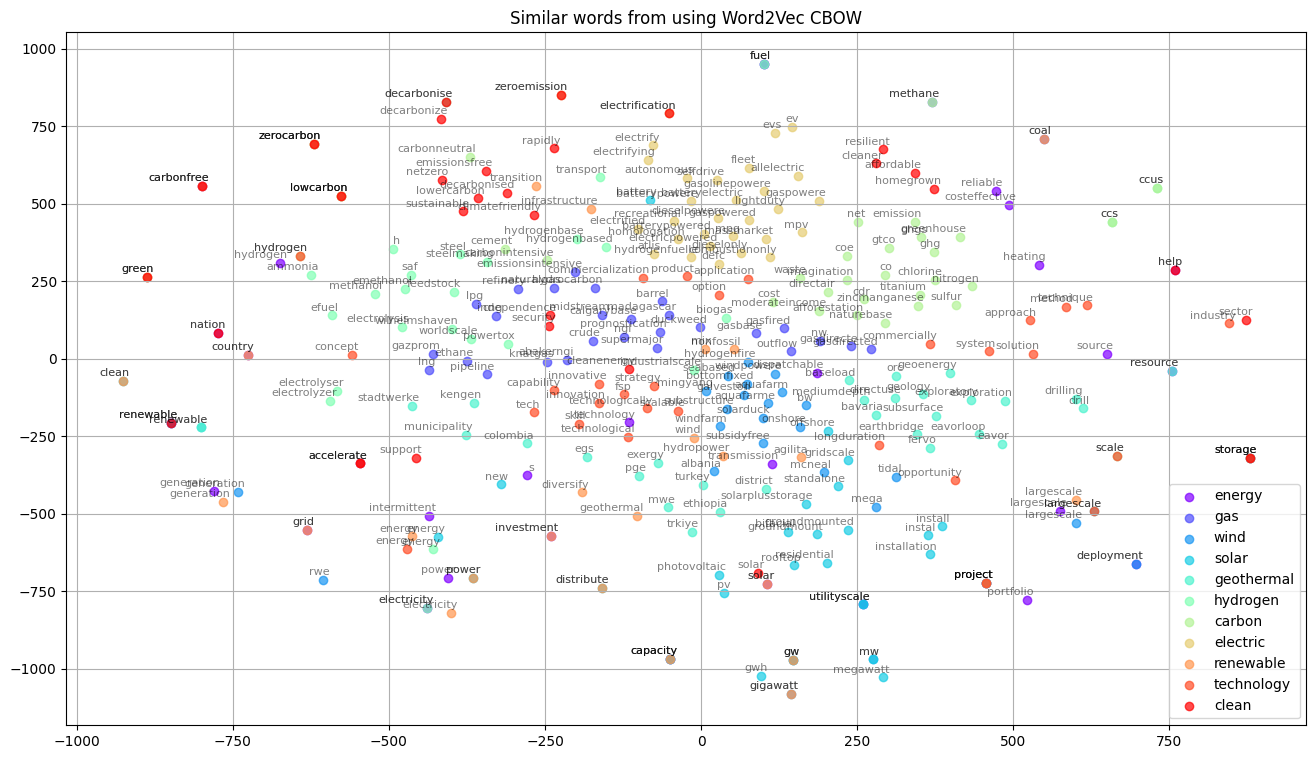

In [55]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Word2Vec CBOW', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

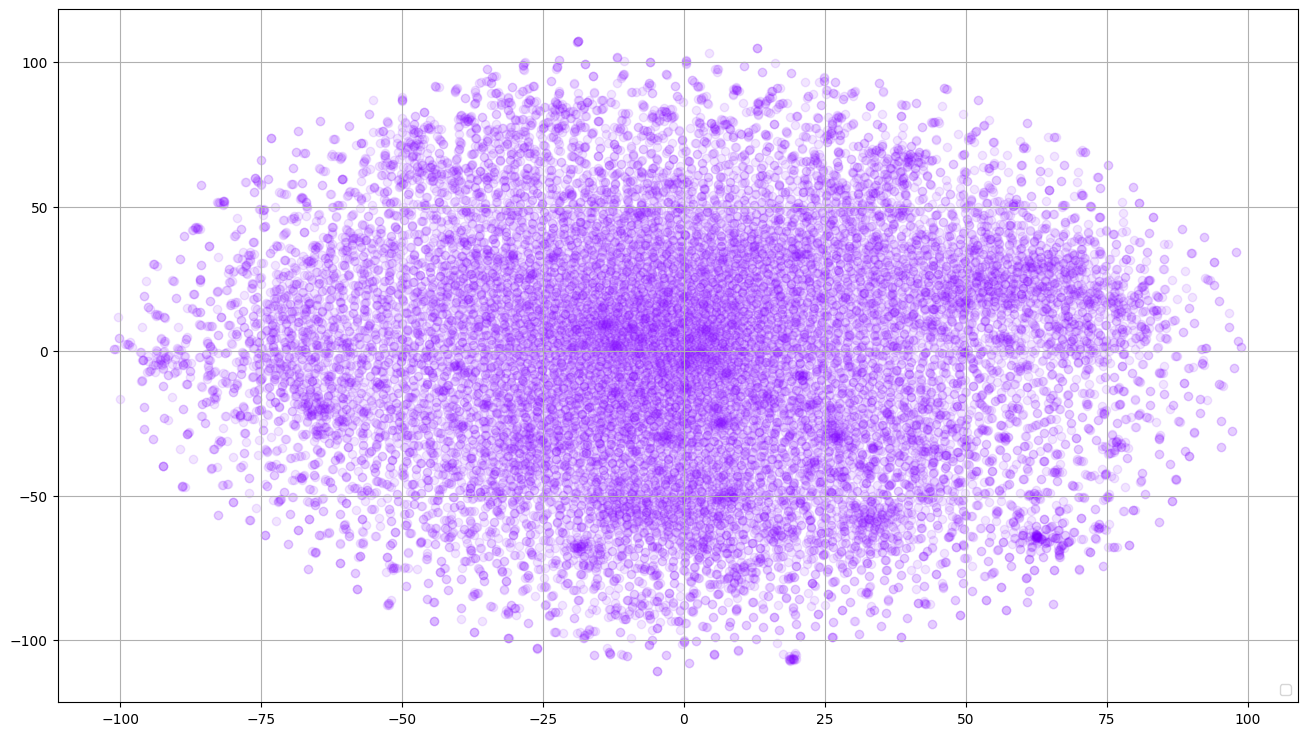

In [65]:
words = []
embeddings = []
for word in list(model.wv.key_to_index.keys()):
    embeddings.append(model.wv[word])
    words.append(word)

embeddings = np.array(embeddings)  # Convert the list to a NumPy array
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = tsne_2d.fit_transform(embeddings)

def tsne_plot_2d(label, embeddings, a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, c=colors, alpha=a)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_2d('Word2Vec CBOW Embeddings', embeddings_2d, a=0.1)

In [73]:
model.wv.save_word2vec_format("/content/drive/My Drive/NLP_models/CBOW_model.model")

### Skip-Gram

Build a new model using skip-gram.

In [39]:
# min_count = removes words with a frequency less than listed
# Vector size = the number of dimensions that gensim Word2Vec maps the words into. Bigger size requires more training data, but can lead to better models
# Workers = parallelization to speeed up training
min_count = 5
vector_size = 200
workers=4

skip_model = gensim.models.Word2Vec(sentences=train_data, min_count=min_count,
                               vector_size=vector_size,workers=workers,
                               compute_loss=True, seed = 72, sg=1, hs=0, epochs=50 )

In [40]:
# getting the training loss value
training_loss = skip_model.get_latest_training_loss()
print(training_loss)

75600672.0


In [41]:
pairs = [
    ('energy', 'electricity'),
    ('energy', 'solar'),
    ('energy', 'gas'),
    ('energy', 'clean'),
    ('energy', 'climate'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, skip_model.wv.similarity(w1, w2)))

'energy'	'electricity'	0.45
'energy'	'solar'	0.39
'energy'	'gas'	0.30
'energy'	'clean'	0.31
'energy'	'climate'	0.18


In [42]:
# 5 most similar words to energy
skip_model.wv.most_similar(positive=['energy'], topn=5)

[('renewable', 0.5450471043586731),
 ('power', 0.46958857774734497),
 ('electricity', 0.4479854702949524),
 ('uretim', 0.44252443313598633),
 ('fervoflextm', 0.4392509460449219)]

In [43]:
# Word Analogy Evaluation
analogies = skip_model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
print("Analogies Score:", analogies[0])

Analogies Score: 0.15585106382978722


In [44]:
# Word Similarity Evaluation
skip_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

(PearsonRResult(statistic=0.40980882685839004, pvalue=4.744039890343196e-13),
 SignificanceResult(statistic=0.4286844492496943, pvalue=2.94292991523429e-14),
 18.69688385269122)

* Pearson correlation coefficient: 0.41
* Significance: p-value = very close to zero
* Spearman rank-order correlation coefficient: 0.4
* Coverage: 18% (percentage of word pairs covered by the model)

The Pearson correlation coefficient measures the linear relationship between the model's similarity scores and the human similarity judgments. In this case, the low p-value suggests that the correlation is statistically significant.

The Spearman rank-order correlation measures how consistently two sets of rankings are related. A higher Spearman coefficient indicates a better performance in capturing the ordinal relationships.

The coverage indicates the percentage of word pairs from the evaluation set that are present in the model's vocabulary.

Overall, these metrics show a slight improvement from the CBOW word2vec model.

The word embeddings made by the model can be visualised by reducing dimensionality of the words to 2 dimensions using tSNE.

In [67]:
keys = ['energy', 'gas', 'wind', 'solar', 'geothermal', 'hydrogen', 'carbon',
        'electric', 'renewable', 'technology', 'clean']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in skip_model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(skip_model.wv.get_vector(similar_word))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

<ipython-input-55-5e22159be8fd>:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



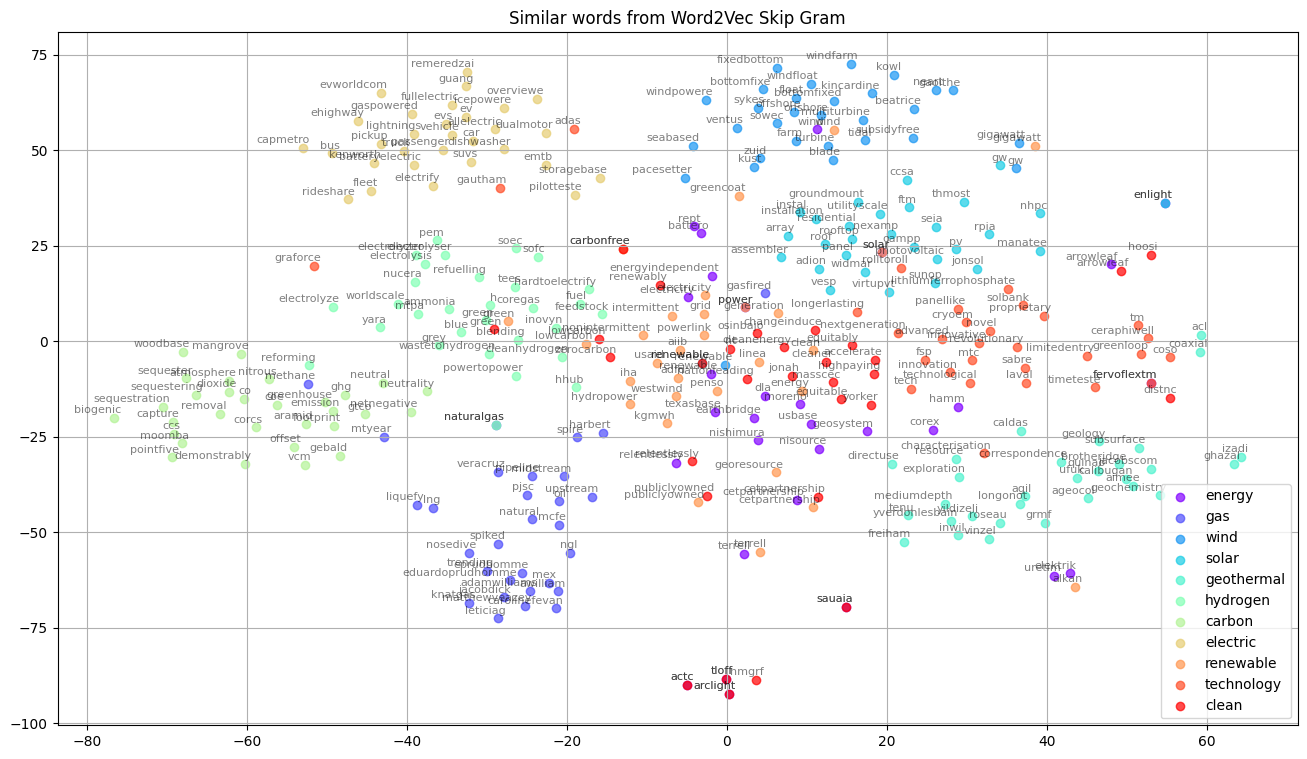

In [68]:
tsne_plot_similar_words('Similar words from Word2Vec Skip Gram', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

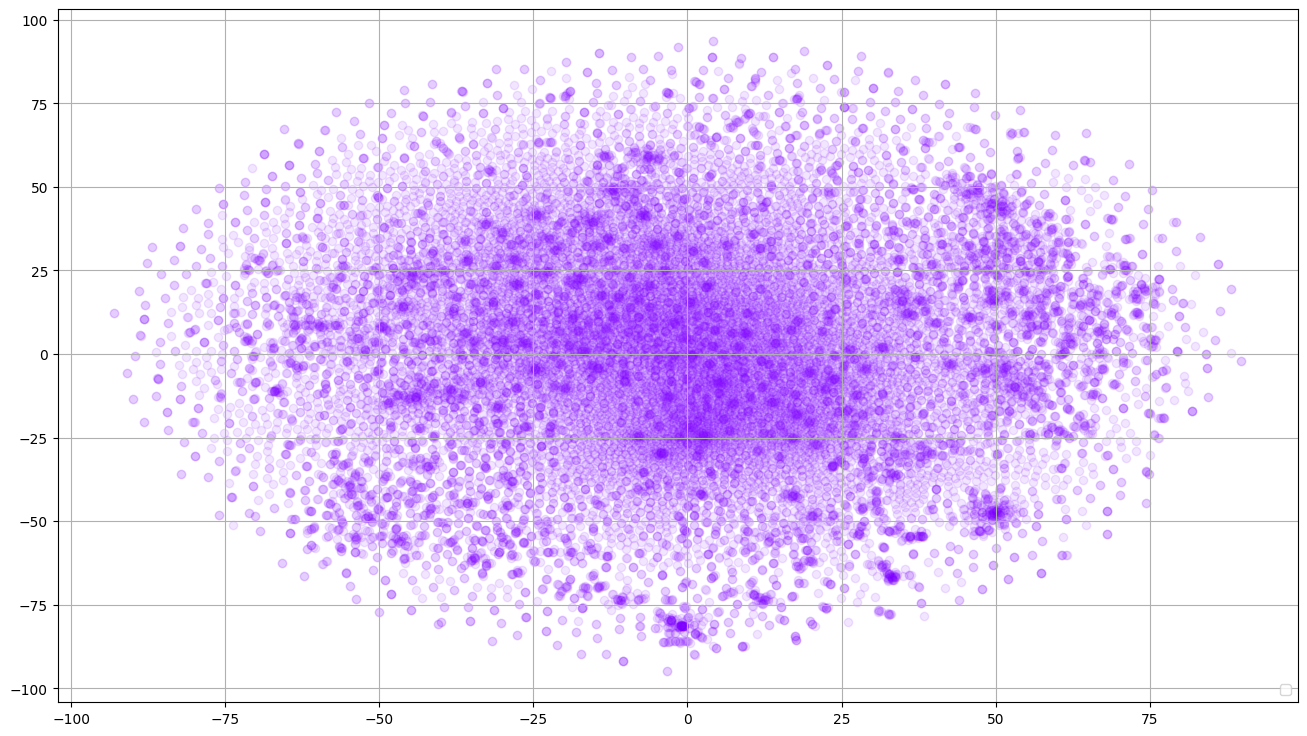

In [69]:
words = []
embeddings = []
for word in list(skip_model.wv.key_to_index.keys()):
    embeddings.append(skip_model.wv[word])
    words.append(word)

embeddings = np.array(embeddings)  # Convert the list to a NumPy array
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = tsne_2d.fit_transform(embeddings)

tsne_plot_2d('Word2Vec Skip Gram Embeddings', embeddings_2d, a=0.1)

The skip gram model has done a much better job of grouping the embeddings and identifying the word similarities.

In [72]:
skip_model.wv.save_word2vec_format("/content/drive/My Drive/NLP_models/skip_gram_model.model")

# Sentence Embeddings

## Doc2Vec

Prepare training and test data.

In [132]:
# Set seeds for reproducibility
SEED = 99
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

# Splitting the dataset into Training and Testing Data
train_data, test_data, train_labels, test_labels = train_test_split(df_labeled["final_cleaned"], df_labeled["topic"], train_size=0.7, random_state=5)

print(len(train_data), len(test_data), len(train_labels), len(test_labels))

6724 2883 6724 2883


We define a funciton to read the corpus line by line (each line of the corpus represents a document), tokenize text into individual words, remove puctuation and set to lowercase. To train the model, we need to associate a tag/number with each document of the training corpus. In our case, the tag is simply the zero-based line number.

In [133]:
def read_corpus(data, tokens_only=False):
    for i, line in enumerate(data):
        tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(train_data,))
test_corpus = list(read_corpus(test_data, tokens_only=True))

In [134]:
# Look at training and test corpus
print(train_corpus[:2])
print(test_corpus[:2])

[TaggedDocument(words=['nextracker', 'manufacturer', 'supply', 'solar', 'tracker', 'software', 'solution', 'globally', 'unimact', 'industrial', 'manufacturing', 'supply', 'chain', 'solution', 'provider', 'mark', 'grand', 'opening', 'manufacturing', 'facility', 'las', 'vegas', 'new', 'facility', 'operate', 'unimact', 'produce', 'steel', 'component', 'exclusively', 'nextracker', 'use', 'groundmount', 'solar', 'project', 'nevada', 'southwestern', 'nextracker', 'sixth', 'public', 'dedication', 'new', 'manufacturing', 'facility', 'th', 'facility', 'company', 'open', 'expand', 'supplier', 'time', 'las', 'vegas', 'facility', 'expect', 'create', 'new', 'job', 'currently', 'expect', 'plant', 'include', 'unimact', 'manufacturing', 'machinery', 'equipment', 'relocate', 'mexico', 'new', 'equipment', 'unimact', 'excited', 'partnership', 'nextracker', 'create', 'new', 'job', 'increase', 'solar', 'produce', 'matt', 'arnold', 'ceo', 'unimact', 'nextracker', 'dedicate', 'line', 'support', 'gigawatt', '

The testing is just a list of lists and should not contain any tags.

Now we intitiate a Doc2Vec model with a vector size with 50 dimensions and iterating over the training corpus 40 times. The minimum word count is set to 2 in order to discard words with very few occurences.

In [135]:
doc_model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

Build the vocabulary which is a list of all the unique words extracted from the training corpus.

In [136]:
doc_model.build_vocab(train_corpus)

In [137]:
# Can view the vocabulary below
doc_model.wv.index_to_key

['energy',
 'solar',
 'project',
 'use',
 'power',
 'new',
 'gas',
 'year',
 'technology',
 'company',
 'system',
 'renewable',
 'storage',
 'market',
 'industry',
 'hydrogen',
 'wind',
 'datum',
 'geothermal',
 'battery',
 'development',
 'site',
 'provide',
 'support',
 'time',
 'need',
 'electric',
 'clean',
 'help',
 'natural',
 'carbon',
 'include',
 'pv',
 'world',
 'production',
 'emission',
 'million',
 'work',
 'plan',
 'climate',
 'cost',
 'vehicle',
 'green',
 'change',
 'global',
 'capacity',
 'state',
 'fuel',
 'electricity',
 'group',
 'supply',
 'website',
 'cookie',
 'increase',
 'price',
 'future',
 'reduce',
 'transition',
 'investment',
 'policy',
 'research',
 'speak',
 'produce',
 'solution',
 'plant',
 'content',
 'high',
 'sector',
 'lead',
 'day',
 'cleantechnica',
 'azocleantech',
 'large',
 'develop',
 'plastic',
 'like',
 'country',
 'good',
 'oil',
 'continue',
 'come',
 'build',
 'process',
 'grid',
 'demand',
 'report',
 'publish',
 'international',
 'comm

In [140]:
# Can view additional attributes using the get_vecattr method
print(f"Word 'energy' appeared {doc_model.wv.get_vecattr('energy', 'count')} times in the training corpus.")

Word 'energy' appeared 43850 times in the training corpus.


Next, we train the model.

In [141]:
doc_model.train(train_corpus, total_examples=doc_model.corpus_count, epochs=doc_model.epochs)

Use the trained model to infer a vector for any piece of text to ensure the model is working.

In [142]:
vector = doc_model.infer_vector([ 'instead','quickly','creating','neutral','planned','farms'])
print(vector)

[-0.7944444  -0.28504625  0.285616   -0.07184423 -0.6003474   0.18748504
 -0.21136662  0.233498    0.24806328  0.6175826   0.08338042  0.02610197
 -0.14504625 -0.46062276  0.15232879  0.14492853  0.17735678 -0.0791738
  0.13299115  0.28500757  0.41543126  0.03827021 -0.07900791 -0.7026748
 -0.08079062  0.25413737  0.04910856  0.34039792  0.26208776 -0.03946253
  0.2630544  -0.46887708  0.16947326  0.5640257   0.5987857   0.39900494
  0.4535527  -0.5266771  -0.38345757  0.18024631  0.52383244  0.9843746
 -0.5112863   0.41381562  0.59288365 -0.22635365 -0.18036796  0.0693581
  0.1213684   0.2912983 ]


Assess the model by obtaining vector representations for each document in the training set. The idea is to rank the documents based on their self-similarity. The expectation is that, if the model has overfit the training data, all the ranks will be less than 2. This is because a document is most similar to itself, and potentially one other document, indicating overfitting. If overfitting has occurred, the model should be able to find similar documents very easily among the training corpus. Additionally, the second ranks are tracked. This is useful for comparing less similar documents. If the model has overfit, the second-ranked documents should be less similar, reflecting a distinction between very similar and less similar documents.

In [143]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = doc_model.infer_vector(train_corpus[doc_id].words)
    sims = doc_model.dv.most_similar([inferred_vector], topn=len(doc_model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

Now we will count how each document ranks with respect to the training corpus.

In [144]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 6716, 1: 8})


Basically, greater than 99% of the inferred documents are found to be most similar to itself and about 1% of the time it is mistakenly most similar to another document. Checking the inferred-vector against a training-vector is a sort of ‘sanity check’ as to whether the model is behaving in a usefully consistent manner, though not a real ‘accuracy’ value.

In [145]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % doc_model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Document (6723): «click allow agree storing cookie device enhance site navigation analyse site usage support provide free open access scientific content info azocleantech speak dr ken chiang rmit university melbourne australia chiang explain team instantly convert co solid groundbreaking study research focus find new way reuse co chemical valorization carbon dioxide produce different source co conversion study perform work research scientist csiro lay foundation current research rmit research cover thermal catalytic photocatalytic conversion co involve conversion co highervalue product chemical synthetic fuel domain look unconventional way decomposition use liquid metal convert co chemical fuel highgrade carbon phd researcher karma zuraiqi experimental technology design smooth integration standard industrial process credit rmit university co conversion technology involve contact gaseous co metal alloy liquid form certain condition ie atmospheric pressure temperature look chemical indus

The most similar document usually has a similarity score close to 1.0, while the second-ranked document should have a significantly lower similarity score, assuming the documents are different. However, the documents in our corpus show more similarieties because the documents all discuss various forms of clean energy. This can also be seen by running the below cell mutliple times.

In [146]:
# Pick a random document from the corpus and infer a vector from the model
import random
doc_id = random.randint(0, len(train_corpus) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

Train Document (3309): «time cleantechnica car year competition cleantechnica team come electric vehicle finalist nominee year award voter choose winner model voting let run rule main aim pick vehicle expect large net positive impact world mean electric vehicle expect sale replace fossil fuel vehicle mean think vehicle transformative influence auto industry simply sale decide finalist think impact term candidate model arrive market quarter previous year case quarter award year case finalist alphabetical order favor specific model chevy bolt ev long market chevy bolt euv bring allpopular appeal affordable longrange electric car market start msrp epaestimated driving range mile km competitive competitive writer jennifer sensiba choose new car recently choose bolt euv explore bolt euv spec feature chevy bolt euv webpage different direction ve ford lightning naturally selling vehicle world recent decade electric version important furthermore opinion ford nail vehicle power outlet capabilit

Using the same approach as above, we will infer the vector for a randomly chosen test document and compare the results.

In [147]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = doc_model.infer_vector(test_corpus[doc_id])
sims = doc_model.dv.most_similar([inferred_vector], topn=len(doc_model.dv))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % doc_model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Test Document (1559): «usspanish research team study ecological effect solar photovoltaic array locate manage grassland plot use hydraulic soil hydrology model field measurement find minimal effect plant carbonwater cycling attribute plant photosynthetic trait change advantage dynamic shading panel international research group investigate impact ground mount solar plant grassland plot find negligible impact grassland carbonwater cycling scientist seek answer question water retention grassland ecosystem resistance weather extreme drought heat wave answer clear end study find agrivoltaic array increase grassland resistance drought corresponding author steven kannenberg tell pv magazine note paper like clarify possibility structure model allow grass die regrow drought commonly observe natural setting discover impact reduction light availability cause solar photovoltaic array grassland photosynthesis researcher use combination field measurement wellestablished plant hydraulic soil hydrolog

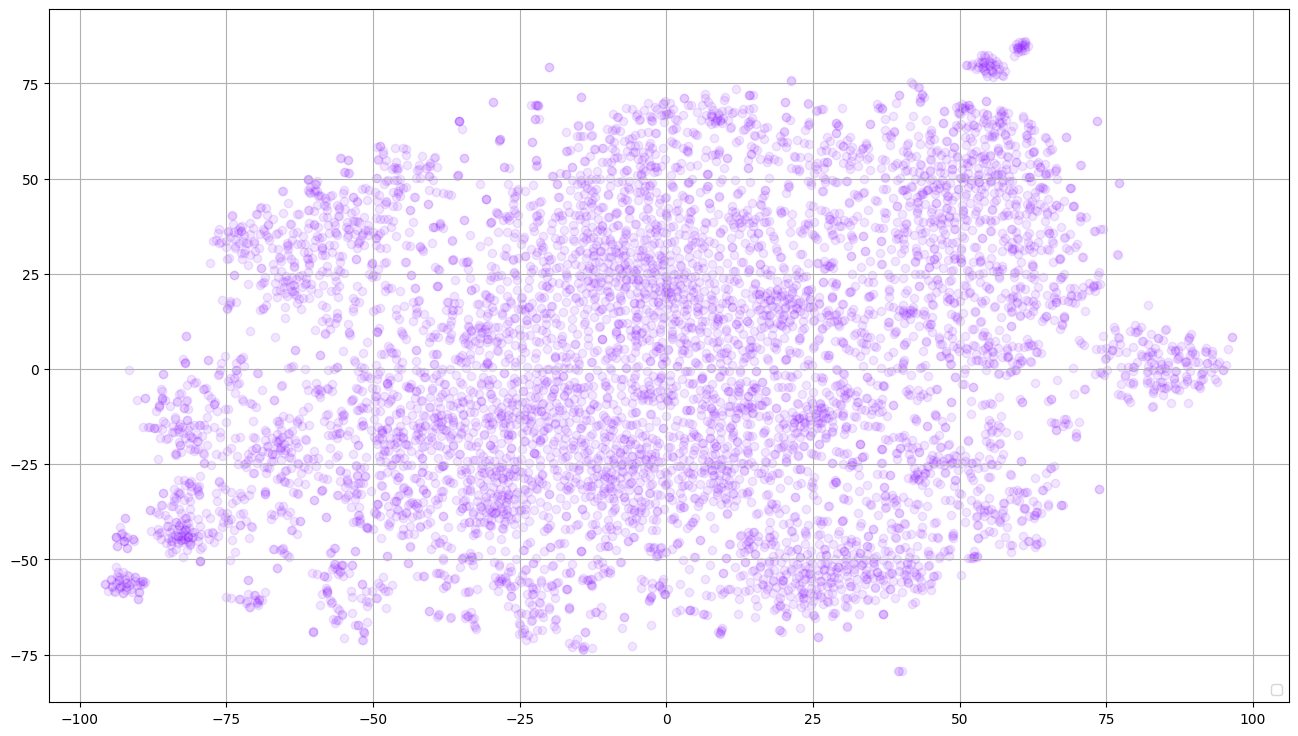

In [149]:
# Get document vectors and corresponding tags
doc_tags = doc_model.dv.index_to_key
doc_vectors = [doc_model.dv[tag] for tag in doc_tags]

# Convert the list to a NumPy array
doc_vectors = np.array(doc_vectors)

tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = tsne_2d.fit_transform(doc_vectors)

tsne_plot_2d('Doc2Vec Embeddings', embeddings_2d, a=0.1)

# Model Evaluation

Now we will compare our in house train word2vec models with a pre-trained model.

In [164]:
# Set seeds for reproducibility
SEED = 40
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

# Splitting the dataset into Training and Testing Data
train_data, test_data, train_labels, test_labels = train_test_split(df_labeled["final_cleaned"], df_labeled["topic"], train_size=0.7, random_state=5)

print(len(train_data), len(test_data), len(train_labels), len(test_labels))

6724 2883 6724 2883


In [165]:
def read_corpus(data, tokens_only=False):
    for i, line in enumerate(data):
        tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(train_data,tokens_only=True))
test_corpus = list(read_corpus(test_data, tokens_only=True))

In [150]:

import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [166]:
min_count = 5
vector_size = 200
workers=4

gnews_model = Word2Vec(sentences=train_corpus, min_count=min_count,
                               vector_size=vector_size,workers=workers,
                               compute_loss=True, seed = 72, sg=1, hs=0, epochs=50)

In [167]:
# getting the training loss value
training_loss = gnews_model.get_latest_training_loss()
print(training_loss)

75345584.0


Retrieve the vocabulary.

In [168]:
for index, word in enumerate(gnews_model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(gnews_model.wv.index_to_key)} is {word}")

word #0/19155 is energy
word #1/19155 is solar
word #2/19155 is project
word #3/19155 is use
word #4/19155 is power
word #5/19155 is new
word #6/19155 is gas
word #7/19155 is year
word #8/19155 is technology
word #9/19155 is company


Obtain word vectors availablie in the model

In [172]:
try:
    vec_energy = gnews_model.wv['energy']
except KeyError:
    print("The word does not appear in this model")

In [174]:
# 5 most similar words to energy
gnews_model.wv.most_similar(positive=['energy'], topn=5)

[('renewable', 0.5613439679145813),
 ('power', 0.471390962600708),
 ('cetpartnership', 0.4384535849094391),
 ('electricity', 0.4376989006996155),
 ('uretim', 0.4246477484703064)]

In [175]:
pairs = [
    ('energy', 'electricity'),
    ('energy', 'solar'),
    ('energy', 'gas'),
    ('energy', 'clean'),
    ('energy', 'climate'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, gnews_model.wv.similarity(w1, w2)))

'energy'	'electricity'	0.44
'energy'	'solar'	0.37
'energy'	'gas'	0.28
'energy'	'clean'	0.32
'energy'	'climate'	0.18


In [177]:
# Word Analogy Evaluation
analogies = gnews_model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
print("Analogies Score:", analogies[0])

Analogies Score: 0.15585106382978722


In [178]:
# Word Similarity Evaluation
gnews_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

(PearsonRResult(statistic=0.43817358161199466, pvalue=6.803889857449891e-15),
 SignificanceResult(statistic=0.4735281405223828, pvalue=1.908714991628476e-17),
 18.69688385269122)

* Pearson correlation coefficient: 0.43
* Significance: p-value = very close to zero
* Spearman rank-order correlation coefficient: 0.4
* Coverage: 18% (percentage of word pairs covered by the model)

The Pearson correlation coefficient measures the linear relationship between the model's similarity scores and the human similarity judgments. In this case, the low p-value suggests that the correlation is statistically significant.

The Spearman rank-order correlation measures how consistently two sets of rankings are related. A higher Spearman coefficient indicates a better performance in capturing the ordinal relationships.

The coverage indicates the percentage of word pairs from the evaluation set that are present in the model's vocabulary.

Overall, these metrics show a slight improvement from the CBOW word2vec model.

The word embeddings made by the model can be visualised by reducing dimensionality of the words to 2 dimensions using tSNE.

In [179]:
keys = ['energy', 'gas', 'wind', 'solar', 'geothermal', 'hydrogen', 'carbon',
        'electric', 'renewable', 'technology', 'clean']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in gnews_model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(gnews_model.wv.get_vector(similar_word))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

<ipython-input-55-5e22159be8fd>:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



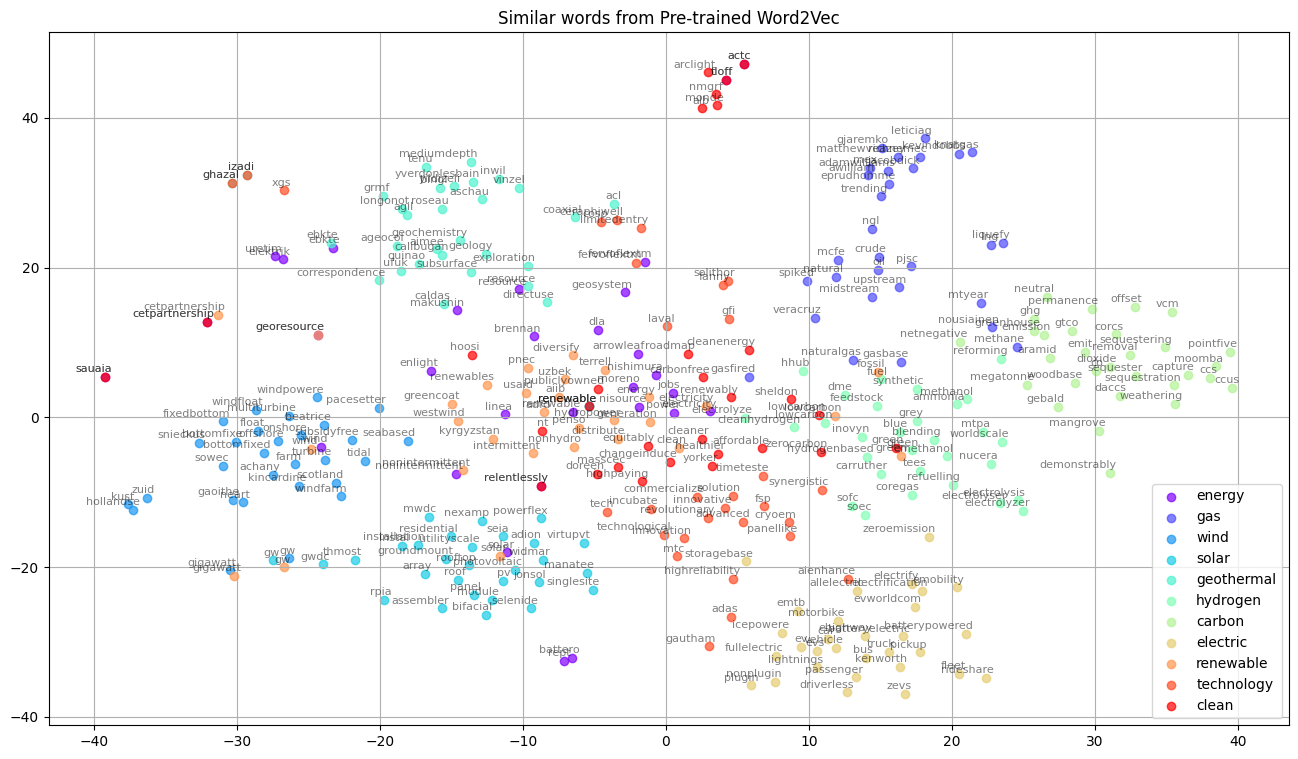

In [180]:
tsne_plot_similar_words('Similar words from Pre-trained Word2Vec', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

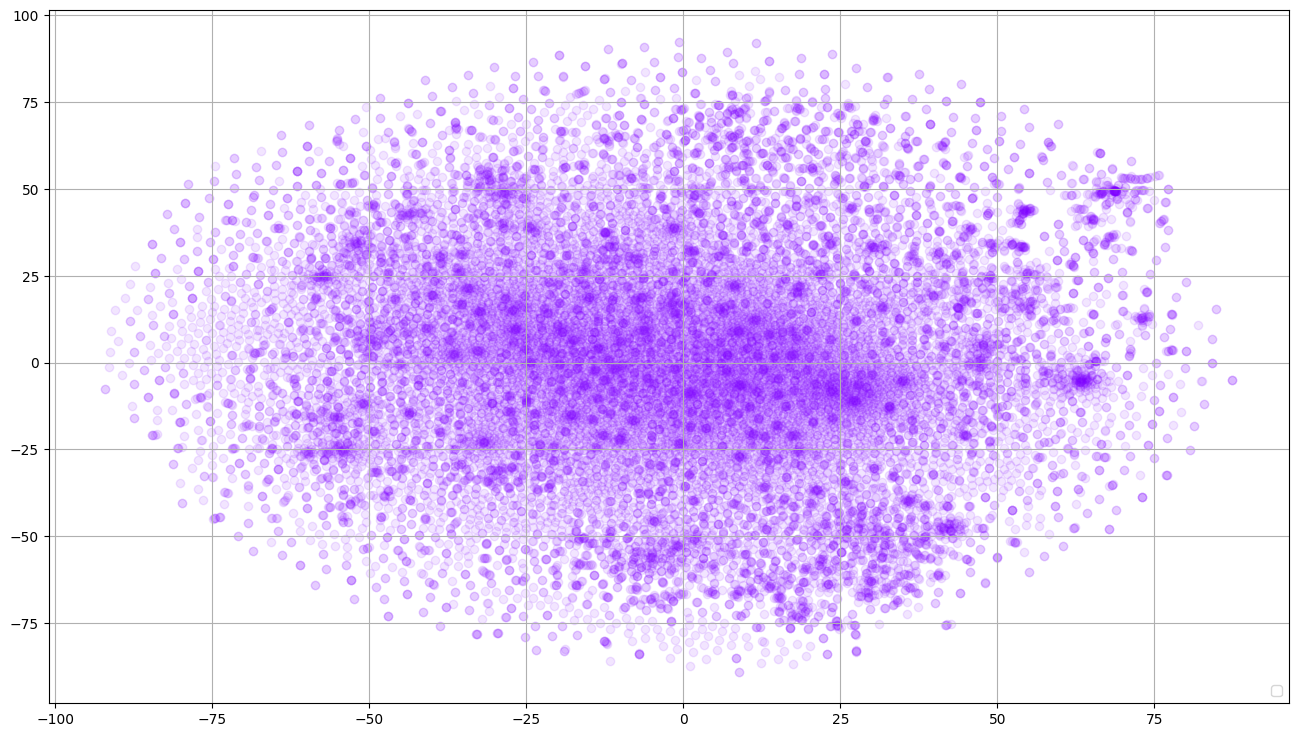

In [181]:
words = []
embeddings = []
for word in list(gnews_model.wv.key_to_index.keys()):
    embeddings.append(skip_model.wv[word])
    words.append(word)

embeddings = np.array(embeddings)  # Convert the list to a NumPy array
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = tsne_2d.fit_transform(embeddings)

tsne_plot_2d('Word2Vec Pretrained Embeddings', embeddings_2d, a=0.1)

# RNN Classification

RNN classification

In [ ]:
# Complete the RNN class
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# # Initialize the model
# rnn_model = RNNModel(input_size, hidden_size, num_layers, num_classes)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(rnn_model.parameters(), lr=0.01)

# # Train the model for ten epochs and zero the gradients
# for epoch in range(10):
#     optimizer.zero_grad()
#     outputs = rnn_model(X_train_seq)
#     loss = criterion(outputs, y_train_seq)
#     loss.backward()
#     optimizer.step()
#     print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

In [183]:
# from torch.nn.utils.rnn import pad_sequence

# # Vectorize the training data
# def vectorize_sequences(sequences, model):
#     vectors = []
#     for sequence in sequences:
#         sequence_vectors = [skip_model.wv[word] for word in sequence if word in skip_model.wv]
#         vectors.append(sequence_vectors)
#     return np.array(vectors)

# X_train_vectors = vectorize_sequences(train_data, skip_model)

# padded_sequences = pad_sequence([torch.tensor(seq) for seq in X_train_vectors], batch_first=True)
# X_train_tensors = padded_sequences

# # Convert the vectors to PyTorch tensors
# #X_train_tensors = torch.tensor(X_train_vectors)
# y_train_tensors = torch.tensor(train_labels, dtype=torch.long)

# # Split the data
# X_train_tensors, X_val_tensors, y_train_tensors, y_val_tensors = train_test_split(
#     X_train_tensors, y_train_tensors, test_size=0.2, random_state=42
# )

# # Define RNN parameters
# input_size = X_train_tensors.shape[2]  # Number of features in the input (size of word embeddings)
# hidden_size = 128
# num_layers = 2
# num_classes = len(set(y_train_seq))

# # Initialize the model
# rnn_model = RNNModel(input_size, hidden_size, num_layers, num_classes)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(rnn_model.parameters(), lr=0.01)

# # Train the model for ten epochs and zero the gradients
# for epoch in range(10):
#     optimizer.zero_grad()
#     outputs = rnn_model(X_train_tensors)
#     loss = criterion(outputs, y_train_tensors)
#     loss.backward()
#     optimizer.step()
    # print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Evaluate RNN model

In [ ]:
# # Create an instance of the metrics
# accuracy = Accuracy(task="multiclass", num_classes=3)
# precision = Precision(task="multiclass", num_classes=3)
# recall = Recall(task="multiclass", num_classes=3)
# f1 = F1Score(task="multiclass", num_classes=3)

# # Generate the predictions
# outputs = rnn_model(X_test_seq)
# _, predicted = torch.max(outputs, 1)

# # Calculate the metrics
# accuracy_score = accuracy(predicted, y_test_seq)
# precision_score = precision(predicted, y_test_seq)
# recall_score = recall(predicted, y_test_seq)
# f1_score = f1(predicted, y_test_seq)
# print("RNN Model - Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}".format(accuracy_score, precision_score, recall_score, f1_score))